Found 136 images belonging to 3 classes.


5/5 [==============================] - 1s 113ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 2 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 0
 2 1 2 2 2 2 2 0 2 1 2 2 2 2 2 1 2 2 2 2 2 1 1 1 2]
classes: ['paper', 'rock', 'scissors']


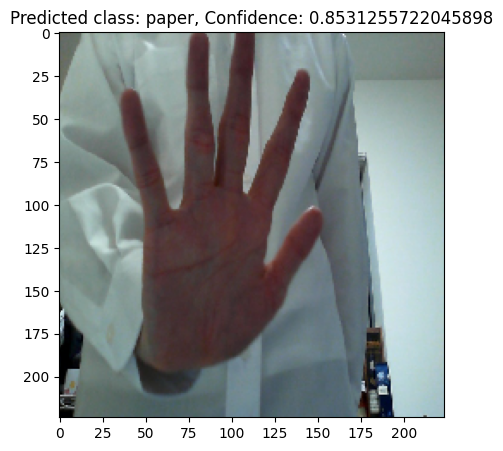

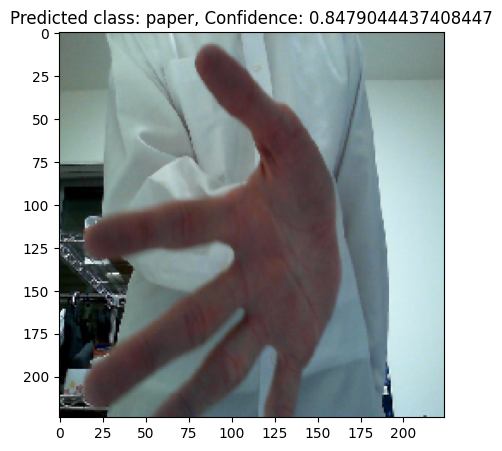

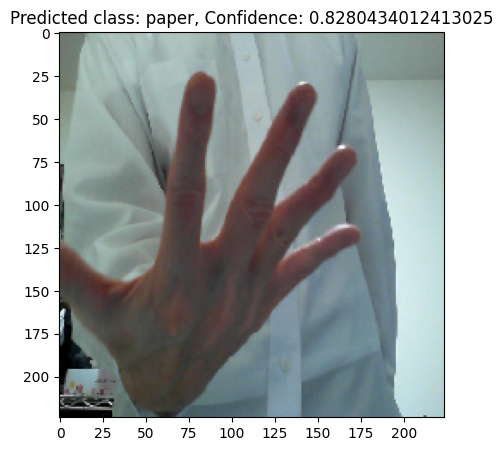

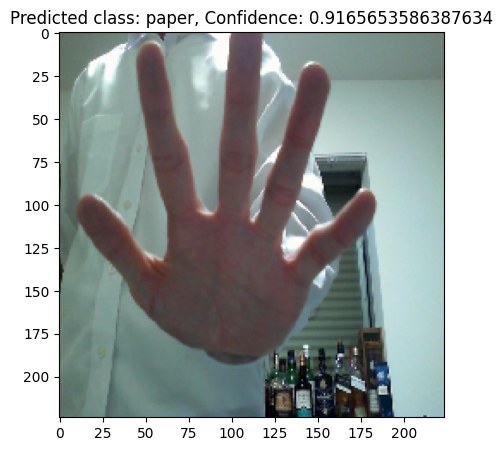

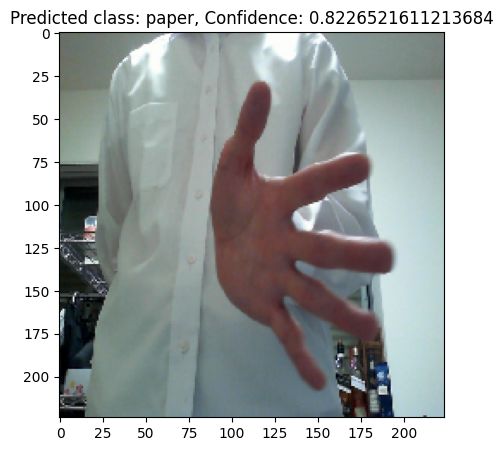

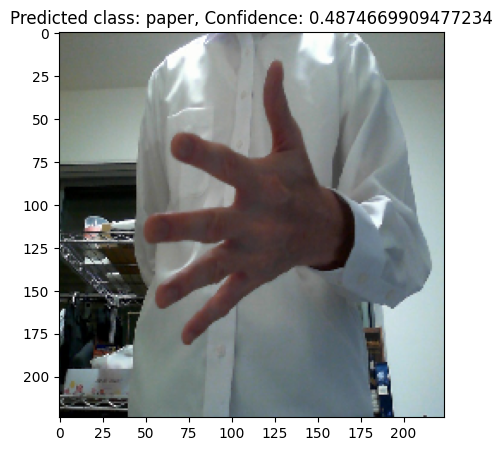

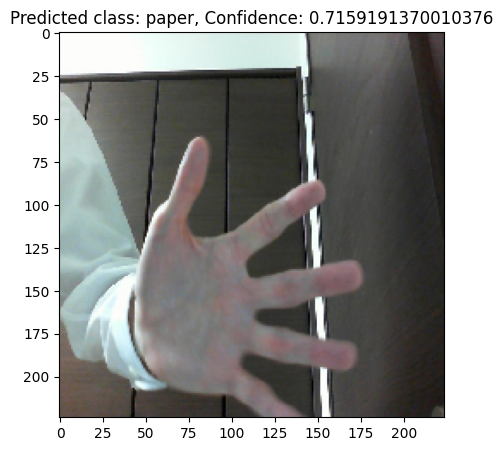

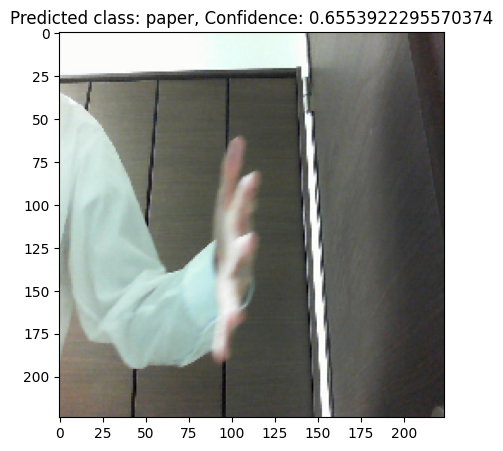

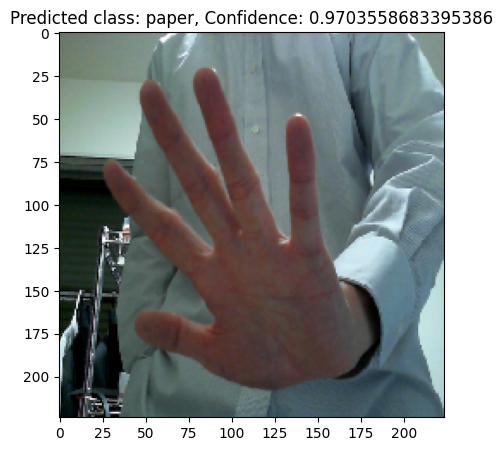

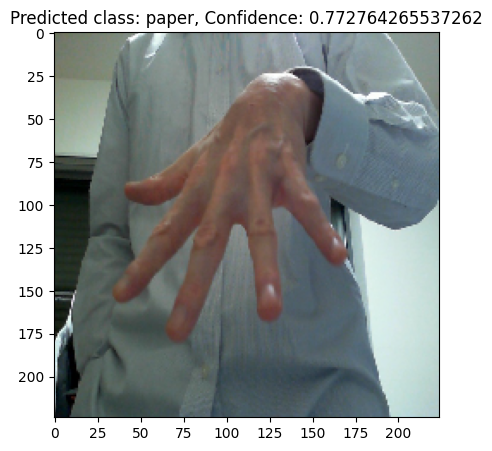

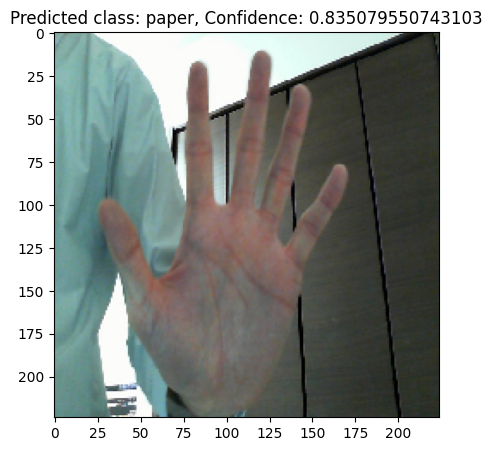

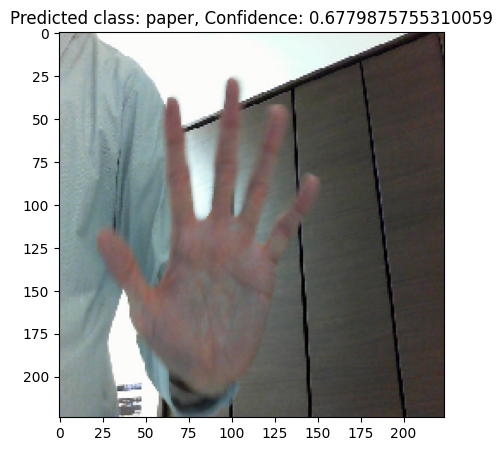

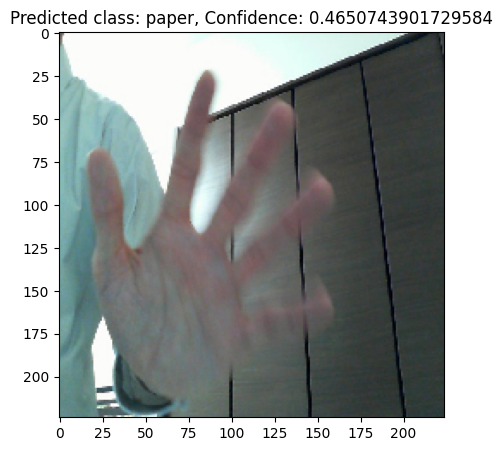

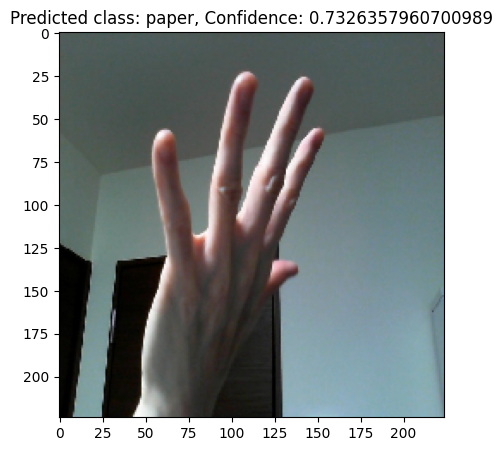

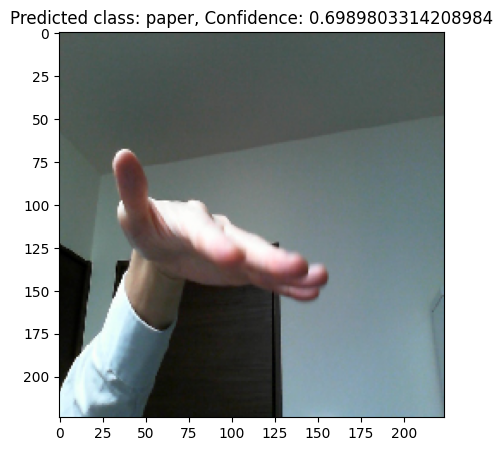

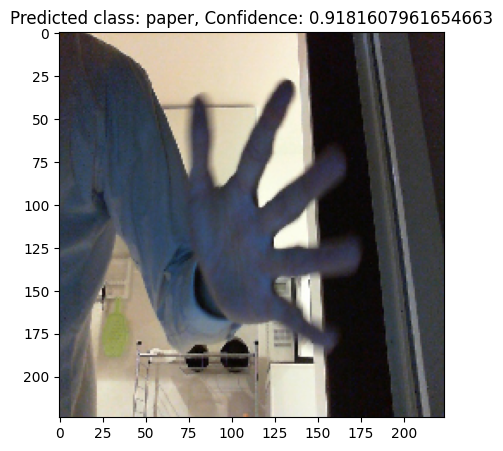

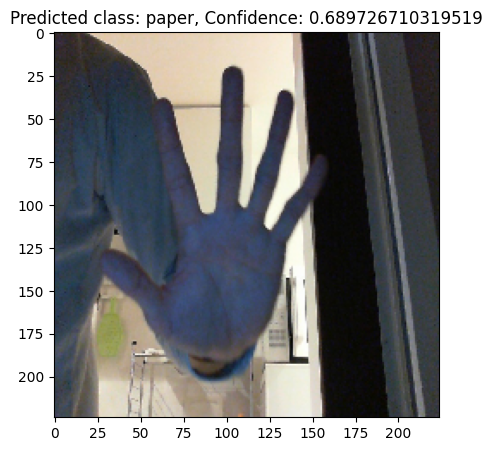

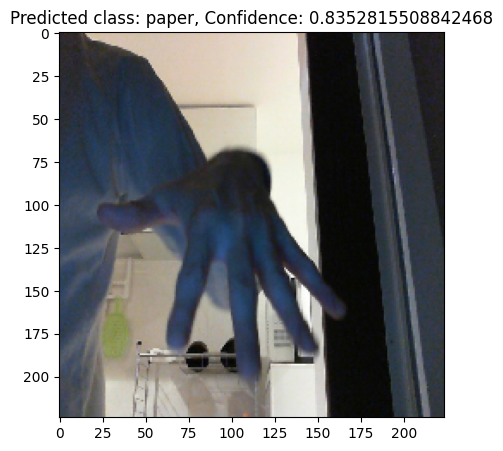

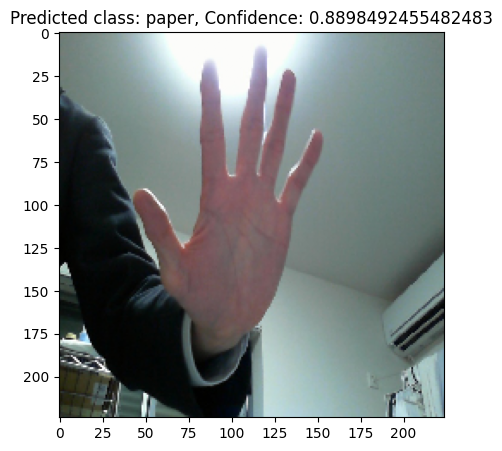

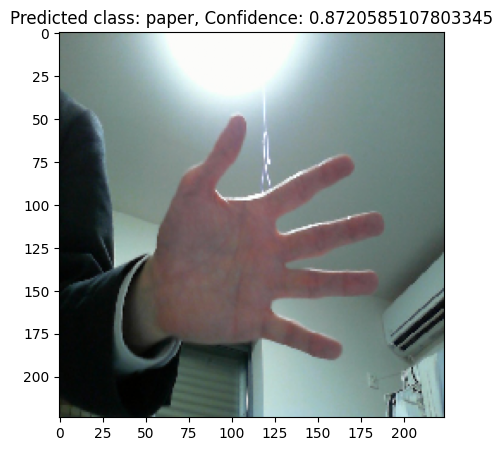

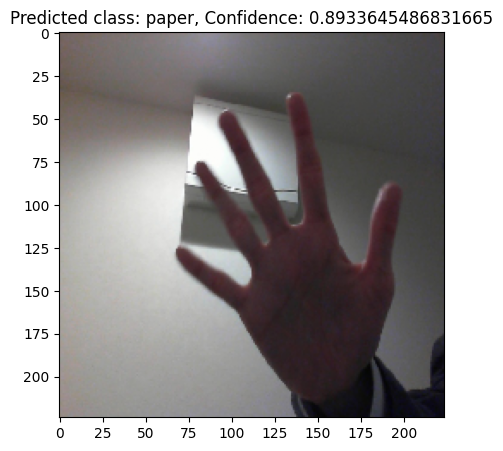

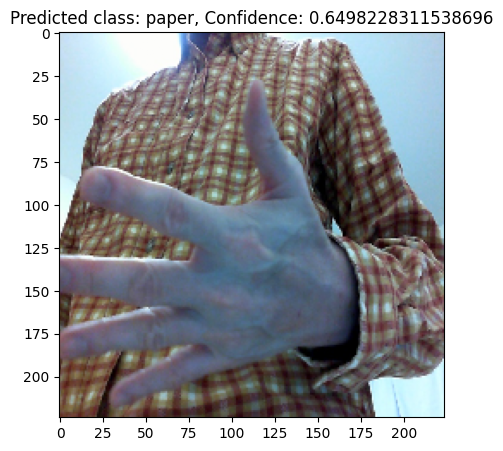

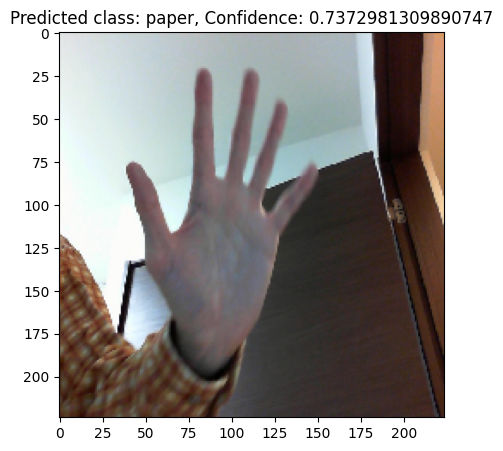

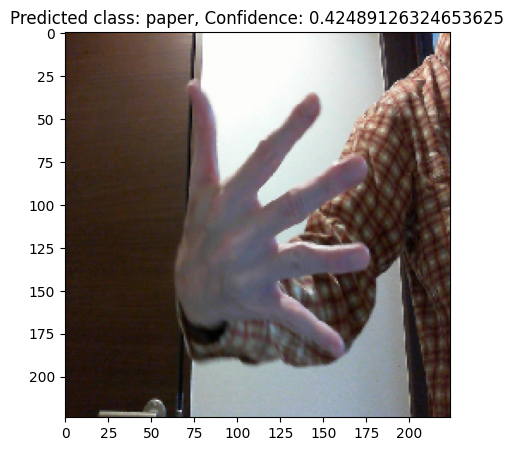

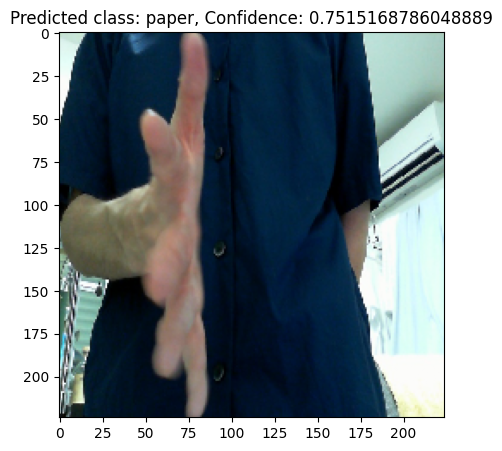

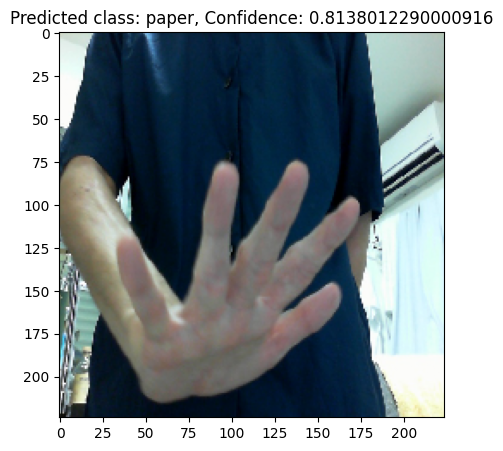

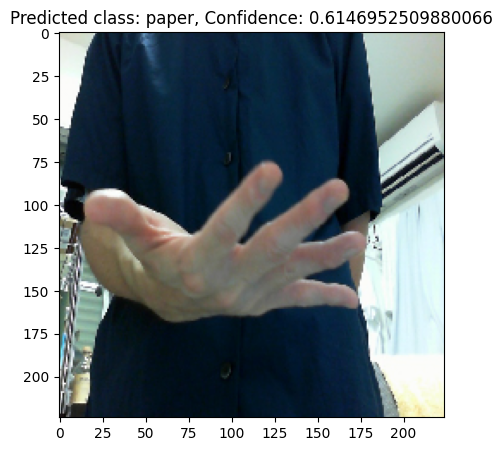

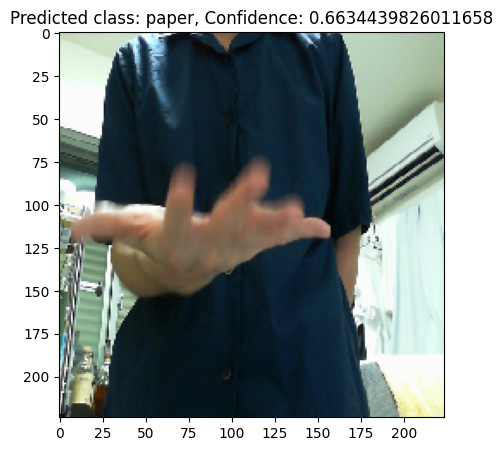

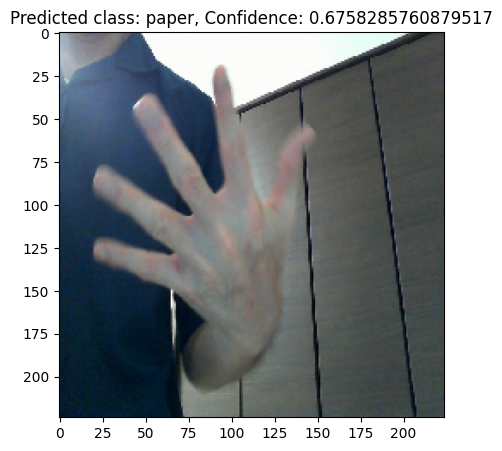

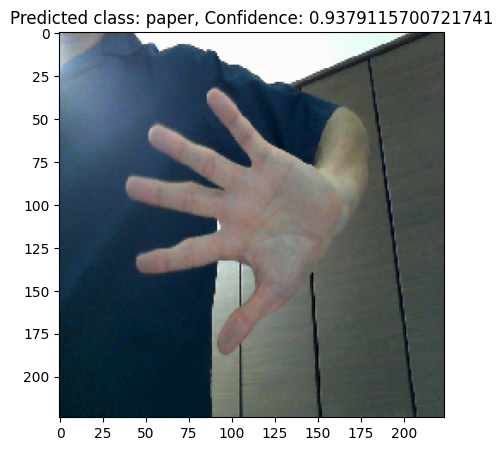

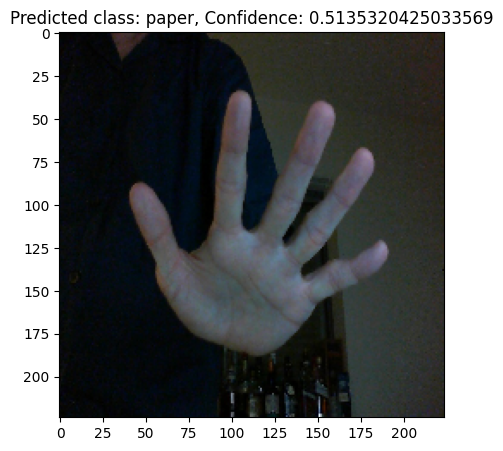

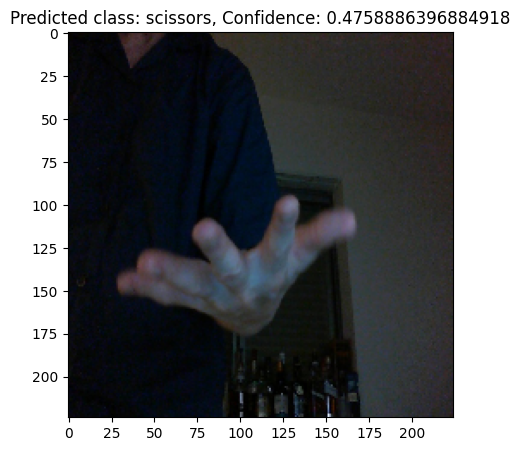

In [8]:
import tensorflow as tf
import numpy as np
from janken_train import target_size
from janken_train import batch_size
from janken_train import preprocessing_function

import tensorflow_hub as hub
import matplotlib.pyplot as plt


def plot(pred_confidence, pred_class, test_gen):
    # 最初のバッチを取得
    images, _ = next(test_gen)
    classes = list(test_gen.class_indices.keys())
    print(f"classes: {classes}")

    for i, img in enumerate(images):
        # 画像を表示
        plt.subplots(figsize=(5, 5))
        plt.imshow(img.astype('float32') / 255.)
        plt.title(f'Predicted class: {classes[pred_class[i]]}, Confidence: {pred_confidence[i][pred_class[i]]}')
        plt.show()
    
def main():
    # 評価用ImageDataGenerator作成
    test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        # preprocessing_function=preprocessing_function
    )
    # 評価用ジェネレータ作成
    test_gen = test_datagen.flow_from_directory(
        "images",
        target_size=(target_size, target_size),
        batch_size=batch_size,
        class_mode="categorical",
        shuffle=False
    )

    # 学習済みモデルロード
    model = tf.keras.models.load_model("test_model.h5", custom_objects={'KerasLayer': hub.KerasLayer})

    # 予測実施
    pred_confidence = model.predict(test_gen)
    pred_class = np.argmax(pred_confidence, axis=1)
    np.array(pred_confidence)

    # 予測結果ファイル出力
    print(pred_class)
    np.savetxt("result.csv", pred_class, fmt="%d")
    plot(pred_confidence, pred_class, test_gen)


if __name__ == "__main__":
    main()
